<a href="https://colab.research.google.com/github/scardenol/ai_2023/blob/main/2.%20Hybrid%20supervised/GAN/src/mnist_lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Run only once!

## Clone GitHub repo ([link to source](https://github.com/scardenol/ai_2023))

In [1]:
!git clone https://github.com/scardenol/ai_2023.git

Cloning into 'ai_2023'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 253 (delta 6), reused 7 (delta 2), pack-reused 229
Receiving objects: 100% (253/253), 85.96 MiB | 24.61 MiB/s, done.
Resolving deltas: 100% (70/70), done.


## Set working directory to import custom modules

In [2]:
%cd "ai_2023/2. Hybrid supervised/CNN/ourMNIST/"

/content/ai_2023/2. Hybrid supervised/CNN/ourMNIST


# Load required libraries and modules

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import load # JP's module

# Load data

In [4]:
# Load images and labels from created data base
images, labels = load.load_all()

# Prepare the data

In [5]:
# Separate images and labels in train and test samples
rp=np.random.permutation(len(labels))

subset_size = int(0.8 * len(rp))
subset_indices = rp[:subset_size]
train_image = [images[i] for i in subset_indices]
train_labels = [labels[i] for i in subset_indices]
train_labels = np.array(train_labels)
train_labels= train_labels.astype(np.uint8)
test_image = [images[i] for i in rp if i not in subset_indices]
test_labels = [labels[i] for i in rp if i not in subset_indices]
test_labels = np.array(test_labels)
test_labels= test_labels.astype(np.uint8)

In [6]:
# Expand image dimensions to agree with tensorflow input format
train_image = tf.expand_dims(train_image, 3)
test_image= tf.expand_dims(test_image, 3)

# Retrieve the validation sample from the previous train set
val_x = train_image[:5000]
val_y = train_labels[:5000]

# Build the LeNet 5 network with keras and tensorflow

In [7]:
# Build the network structure
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_image[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [8]:
# Define the network optimizer
lenet_5_model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# Retrain the network with our created data base 

In [9]:
# Train the network and perform validation with 10% of the training data
history =  lenet_5_model.fit(train_image, train_labels, epochs=10, validation_split = 0.1)

Epoch 1/10
14/14 [==============================] - 6s 149ms/step - loss: 2.2996 - accuracy: 0.1298 - val_loss: 2.2474 - val_accuracy: 0.1429
Epoch 2/10
14/14 [==============================] - 1s 86ms/step - loss: 2.1665 - accuracy: 0.2346 - val_loss: 2.1413 - val_accuracy: 0.2653
Epoch 3/10
14/14 [==============================] - 1s 76ms/step - loss: 1.9963 - accuracy: 0.3349 - val_loss: 1.8772 - val_accuracy: 0.3878
Epoch 4/10
14/14 [==============================] - 1s 61ms/step - loss: 1.7708 - accuracy: 0.4214 - val_loss: 1.5975 - val_accuracy: 0.4898
Epoch 5/10
14/14 [==============================] - 1s 48ms/step - loss: 1.5969 - accuracy: 0.4852 - val_loss: 1.4535 - val_accuracy: 0.4898
Epoch 6/10
14/14 [==============================] - 1s 49ms/step - loss: 1.4860 - accuracy: 0.5216 - val_loss: 1.3543 - val_accuracy: 0.5918
Epoch 7/10
14/14 [==============================] - 1s 45ms/step - loss: 1.3822 - accuracy: 0.5740 - val_loss: 1.2245 - val_accuracy: 0.6327
Epoch 8/10
1

# Visualize and save results

In [10]:
# Print the performance metrics
_, train_acc = lenet_5_model.evaluate(train_image, train_labels, verbose=0)
_, test_acc = lenet_5_model.evaluate(test_image, test_labels, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.650, Test: 0.557


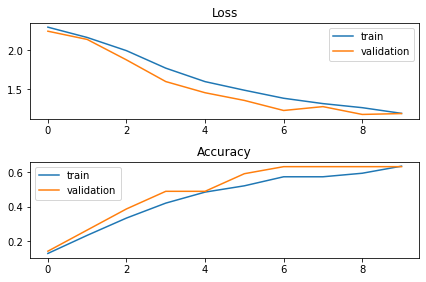

In [11]:
# Plot the loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();
# Plot the accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.tight_layout(pad=1.0)
plt.savefig('/content/loss.png');